* 02/03/2023
* Cyclistic data analysis
* Sacha Lancman

## Checking, cleaning and preparing the data:



* Files from month 1 through 12 loaded 

* The 12 tables have been turned into 1 table (aggregate the data): trips_1_12

* Kept the most important columns to solve the problem

* Ordered by 'started_at' -- date started


In [ ]:
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.1`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.2`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.3`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.4`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.5`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.6`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.7`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.8`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.9`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.10`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.11`
UNION ALL
SELECT started_at, ended_at, start_lat, start_lng, end_lat, end_lng, member_casual , rideable_type 
FROM `linear-potion-369716.tripdata01.12`
ORDER BY started_at


* Check for blanks: the results: 5858 (out of more than 5 million) end_lng and end_lat are NULL.


In [ ]:
SELECT * 
FROM `linear-potion-369716.tripdata01.trips_1_12` 
WHERE member_casual IS NULL 
OR started_at IS NULL
OR ended_at IS NULL
OR rideable_type IS NULL
OR start_lat IS NULL 
OR start_lng IS NULL
OR end_lat IS NULL
OR end_lng IS NULL


* Check the longitudes and latitudes for outliers: the results: 1 outlier, but might not be a mistake.


In [ ]:
SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY start_lat desc 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY start_lat  
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY start_lng desc 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY start_lng 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY end_lat desc 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY end_lat 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY end_lng desc 
LIMIT 100

SELECT start_lat, start_lng, end_lat, end_lng 
FROM `linear-potion-369716.tripdata01.new_trips_done`  
ORDER BY end_lng
LIMIT 100


* Check for misspellings:

In [ ]:
SELECT DISTINCT member_casual 
FROM `linear-potion-369716.tripdata01.trips_1_12` 

SELECT DISTINCT rideable_type 
FROM `linear-potion-369716.tripdata01.trips_1_12` 

* Check the dates, latitudes and longitudes:

In [ ]:
SELECT MIN(started_at), 
       MIN(ended_at), 
       MAX(started_at), 
       MAX(ended_at),
       MIN(start_lat), 
       MIN(end_lat), 
       MAX(start_lng), 
       MAX(end_lng)
FROM `linear-potion-369716.tripdata01.trips_1_12` 

* Check the type the data in each of the different columns:

In the preview section of Bigquery.





* Add a column with the ride lentgh in minute
* Add a column with the hour of the day
* Add a column with the Day of the week
* Add a column with the week of the year 
* Add a column with the Month of the year:

In [ ]:
SELECT *, 
timestamp_diff(ended_at, started_at, minute) AS ride_length_min, 
extract(HOUR from started_at) AS hour,
extract(DAYOFWEEK from started_at) AS day,
extract(WEEK from started_at) AS week,
extract(MONTH from started_at) AS month
FROM `linear-potion-369716.tripdata01.new_trips_v1` 
ORDER BY started_at


* Final table info:

* Number of rows 5,667,717
* Total logical bytes 597.06 MB

1. started_at	      TIMESTAMP				
2. ended_at	          TIMESTAMP	 			               
3. start_lat	      FLOAT	 			
4. start_lng	      FLOAT	  		
5. end_lat	          FLOAT	 			
6. end_lng	          FLOAT	 			
7. member_casual	  STRING	 			
8. rideable_type	  STRING	 			
9. ride_length_min	  INTEGER	 			
10. hour	          INTEGER	 			
11. day	              INTEGER	 			
12. week	          INTEGER	 			
13. month	          INTEGER

## Analysis and Viz:



* Question to answer: 

How do annual members and casual riders use Cyclistic bikes differently?





* Anaysis and viz are done on Tableau, here are the different viz:

1. Bar chart, x = hour, y = count trips, color = member_casual

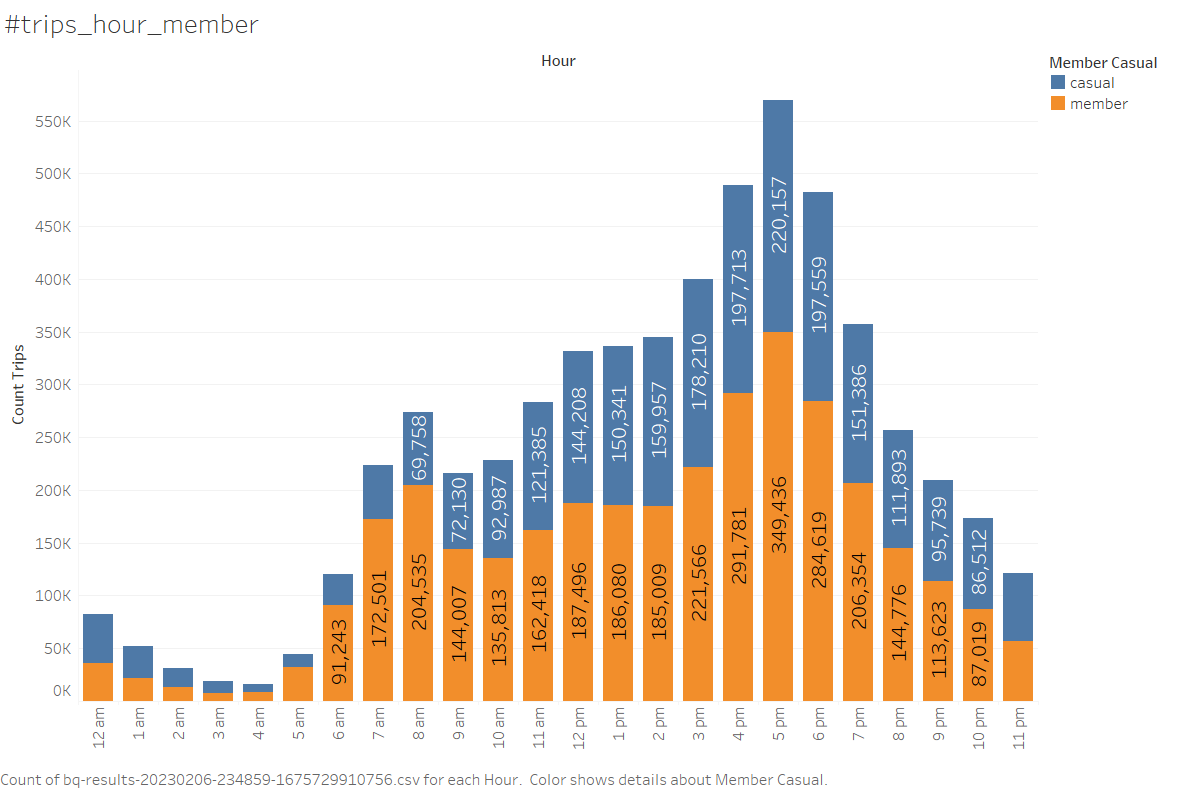

* Observations Viz 1:

* The busiest hour of the day is 5pm.
* Between 5am and 9am, and between 4pm and 6pm, there are a lot more trips started by annual members
than trips started by casual riders. This can be explained by annual members going to work on a bike.
* The number of trips started by casual riders is larger only from 11pm to 3am.

2. Double bar chart, x = day and x = member_casual, y = count trips, color = member_casual

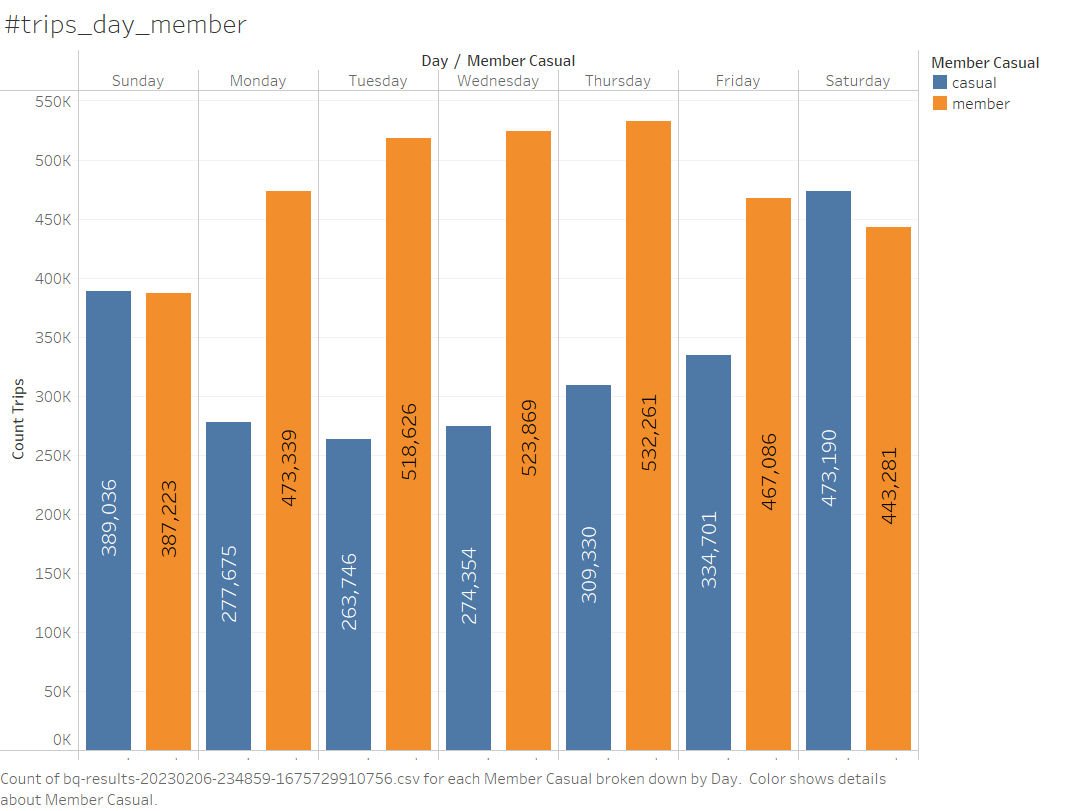

* Observations Viz 2:

* Annual members start more trips during the weekdays whereas casual rides start more trips during the weekend.
This can also be explained by annual members going to work by bike. 
* Annual members start as many trips as the casual riders during the weekend, but during the weekdays, annual 
members start 1.5x to 2x more trips than the casual riders.

3. Double bar chart, x = month and x = member_casual, y = count trips, color = member_casual

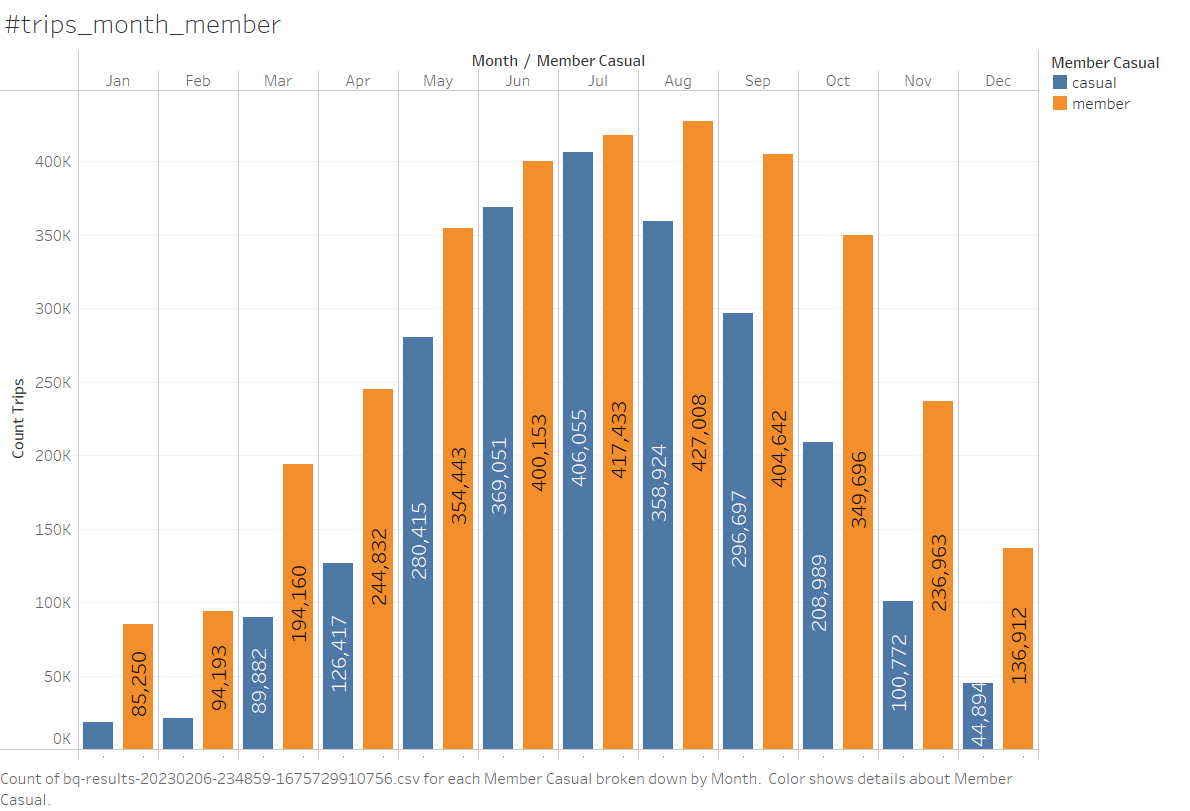

* Observations Viz 3:

* The busiest months are June, July, August. Next comes May, September and October. 
* During the Summer, casual riders start close to as many trips as the annual members. But the colder it gets, the lower 
the users. 
* Annual members as a better retention ratio: If we compare July and January, the number of trips started 
by casual member is 20x less. In comparison, taking the same 2 month, the number of trips started by 
annual members is only 5x less. 
* I see a negative correlation with snow falls and positive correlation
with the temperature. No correlation with the precipitations.


4. Horizontal bar chart,  x = average ride_length, y = hours, color = member_casual

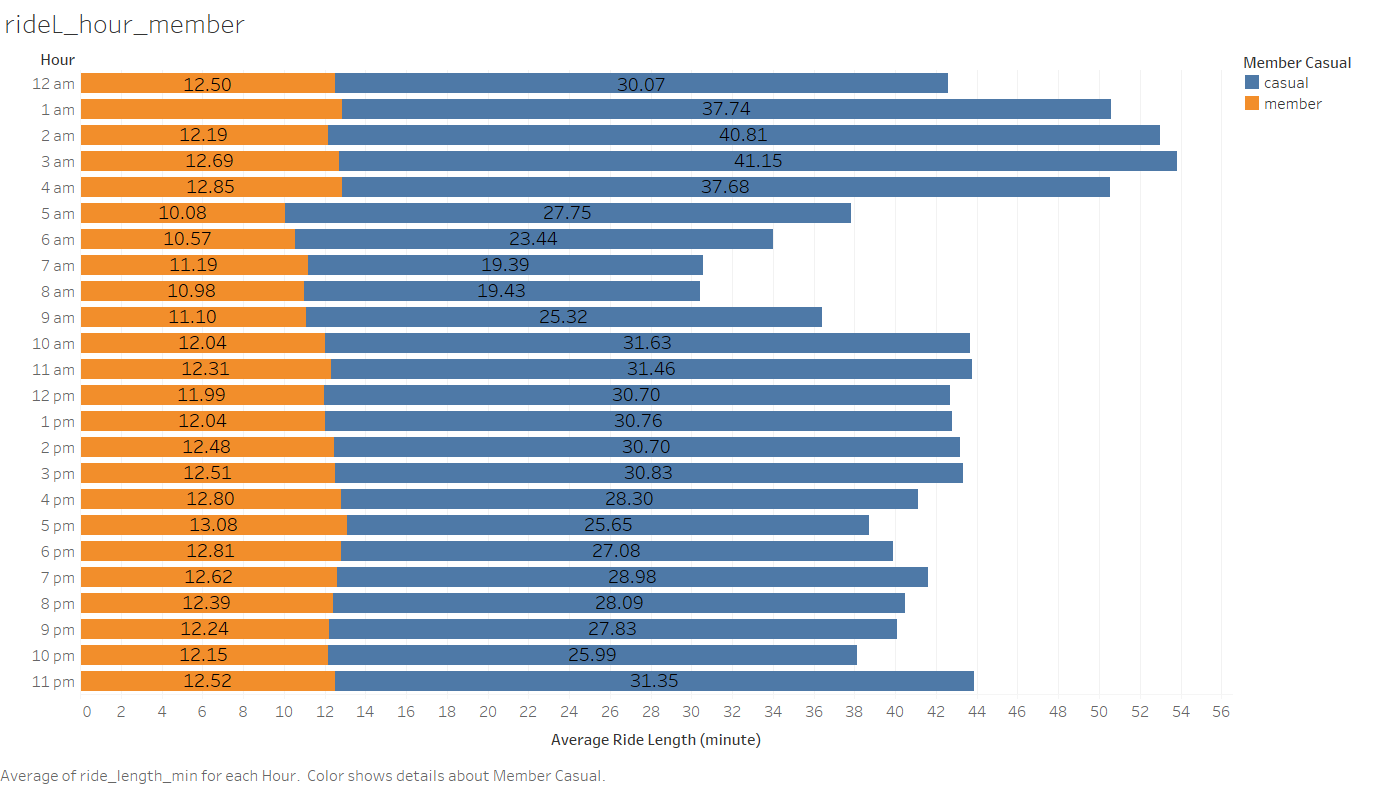

5. Double bar chart, x = day and x = member_casual, y = average ride_length, color = member_casual

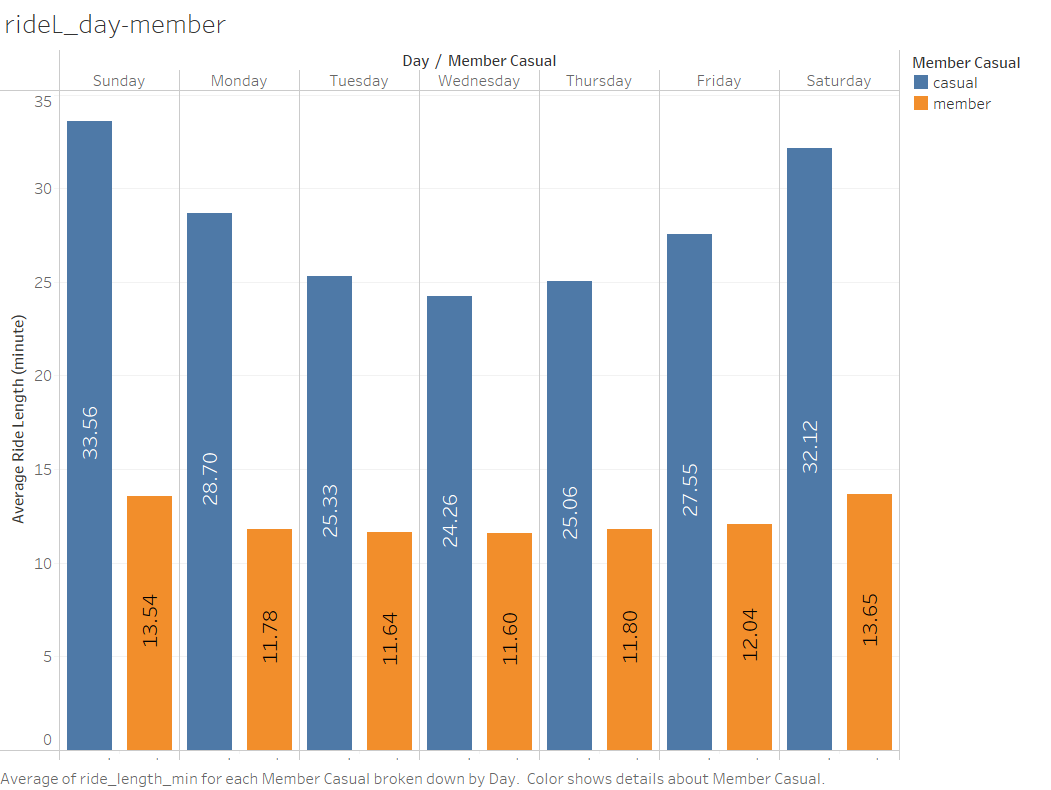

6. Double bar chart, x = month and x = member_casual, y = average ride_length, color = member_casual

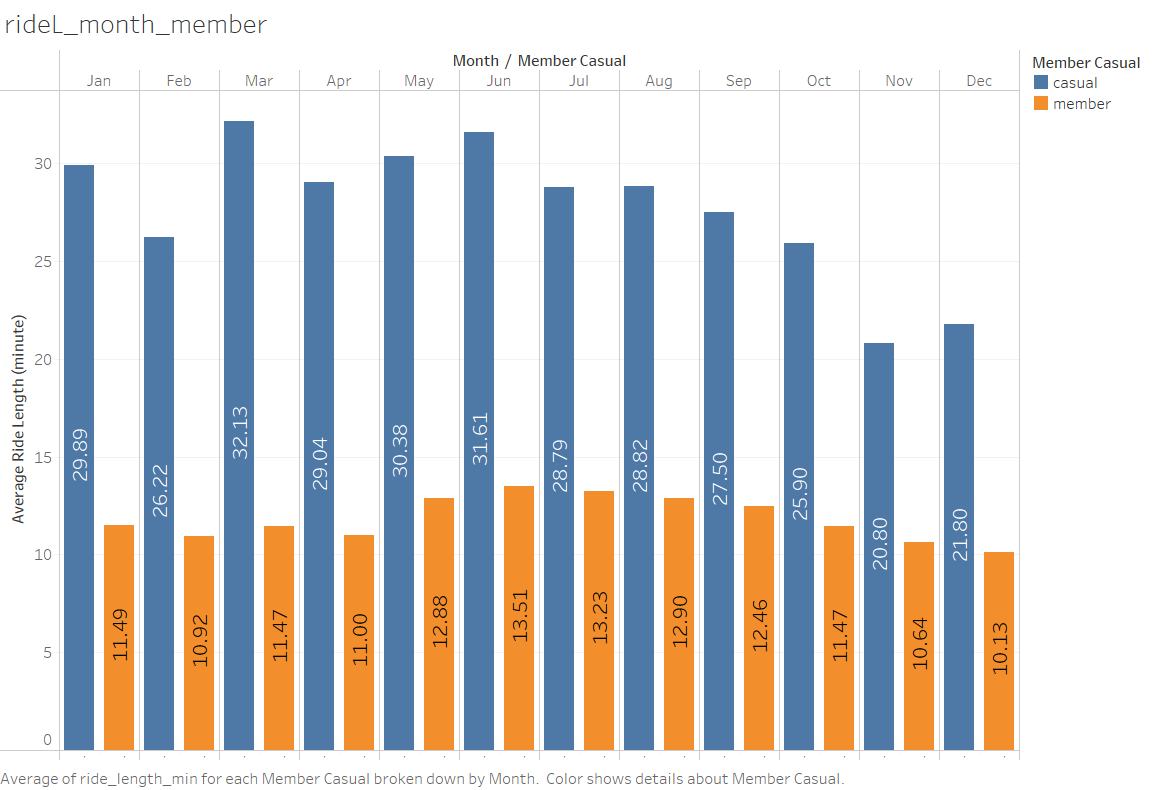

* Observations Viz 4, 5, and 6:

* No matter what time, day, or month it is, annual members will have their average ride length being between
12 and 13 minutes. 
* On the other hand, the average ride length can go from 19 to 41 minutes. On average, their trips is 2 to 3 times 
longer than annual members' trips.

7. Double bar chart, x = rideable_type and x = member_casual, y = count trips, color = member_casual

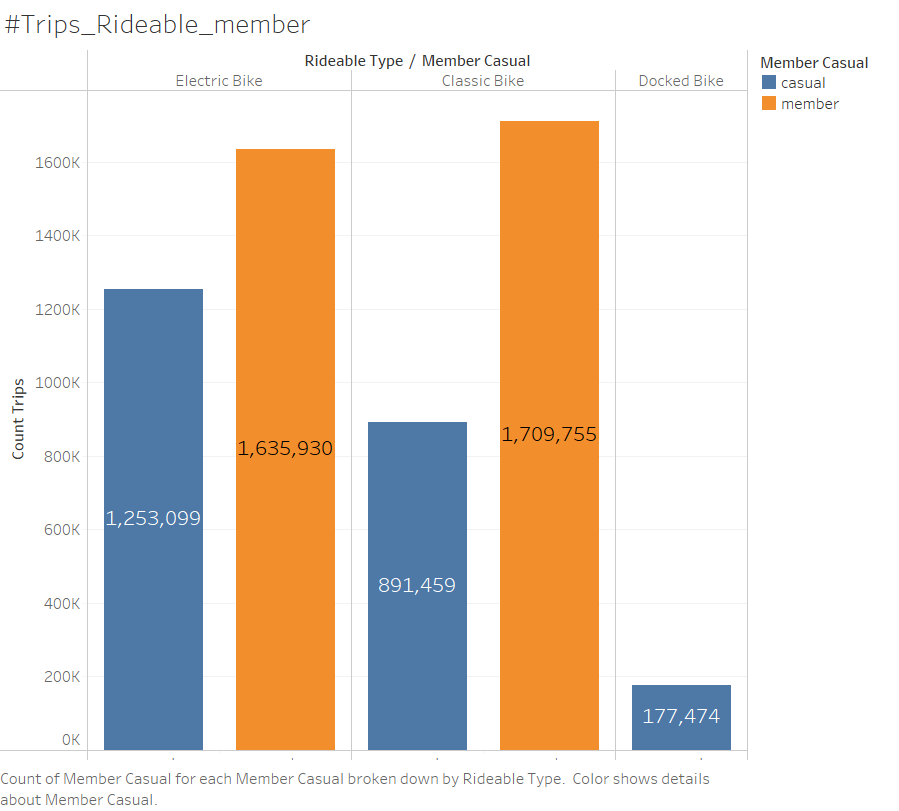

8. Double bar chart, x = rideable_type and x = member_casual, y = average ride_length, color = member_casual

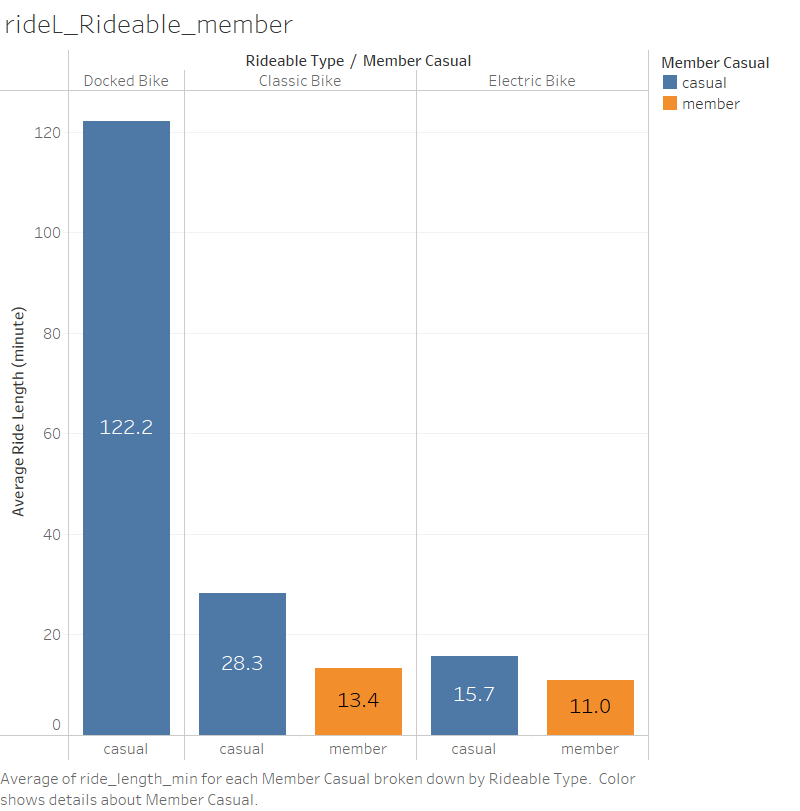

* Observations Viz 7 and 8:

* Casual riders have a slight preference for electric bikes compared to classic bike. 
* They use 5 to 6 times less the docked bikes, but when they use it, it is for an average of 2 hours (120 minutes). 
* Annual members do not use docked bikes, and have no preference between the classic bikes and the electric bikes. They do 
spend a little less times on electric bikes, probably because it is faster than the classic bike.

9. Highlighted table, x = month, y = hour and y = member_casual (makes a table for each), color = count trips

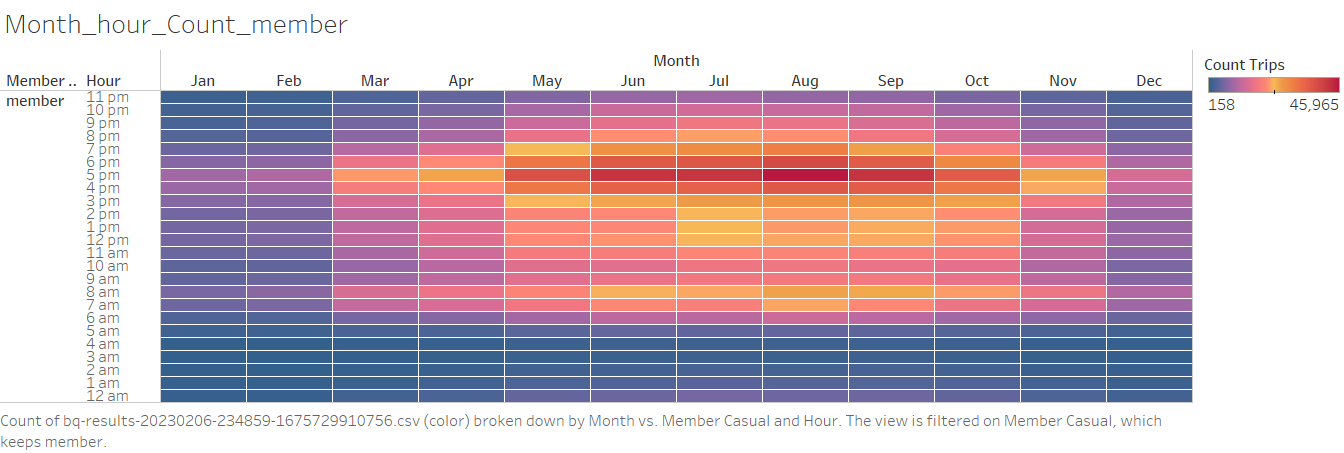

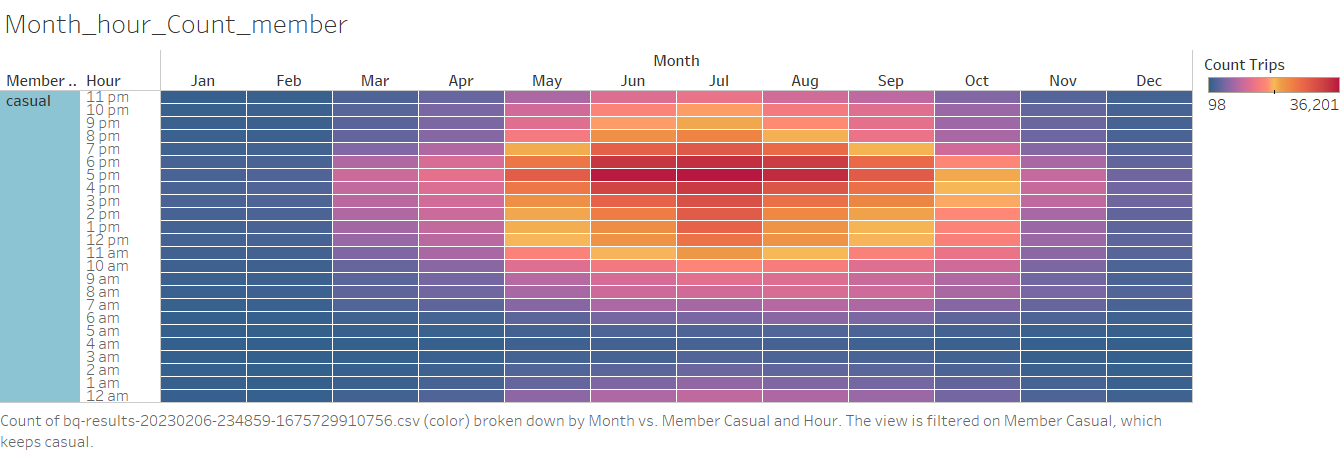

* Observations Viz 9:

* Mixes the viz 1 and 3 with a different format.

* it is very easy to see the correlation with the "Hourly Temperature in 2022 in Chicago" below.

10. Highlighted table, x = hour, y = day  and y = member_casual (makes a table for each), color = count trips

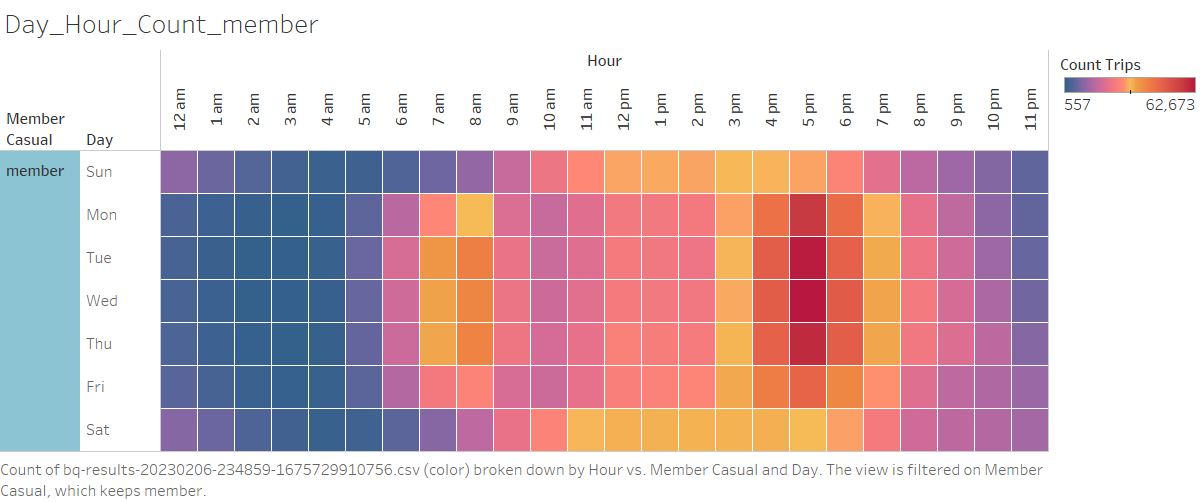

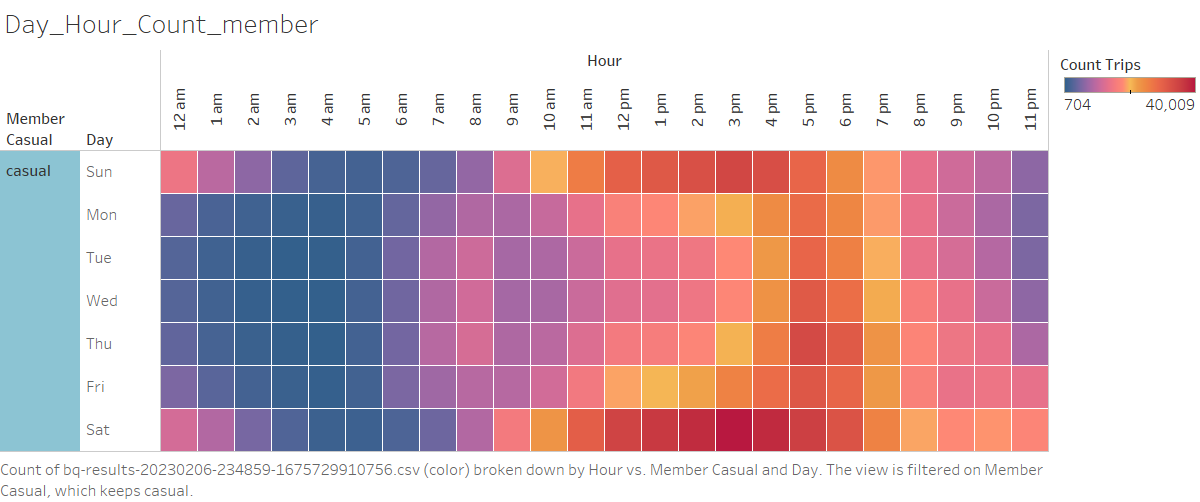

* Observations Viz 10:

* Mixes the viz 1 and 2 with a different format. Same observations.

11. Highlighted table, x = month, y = day and y = member_casual (makes a table for each), color = count trips

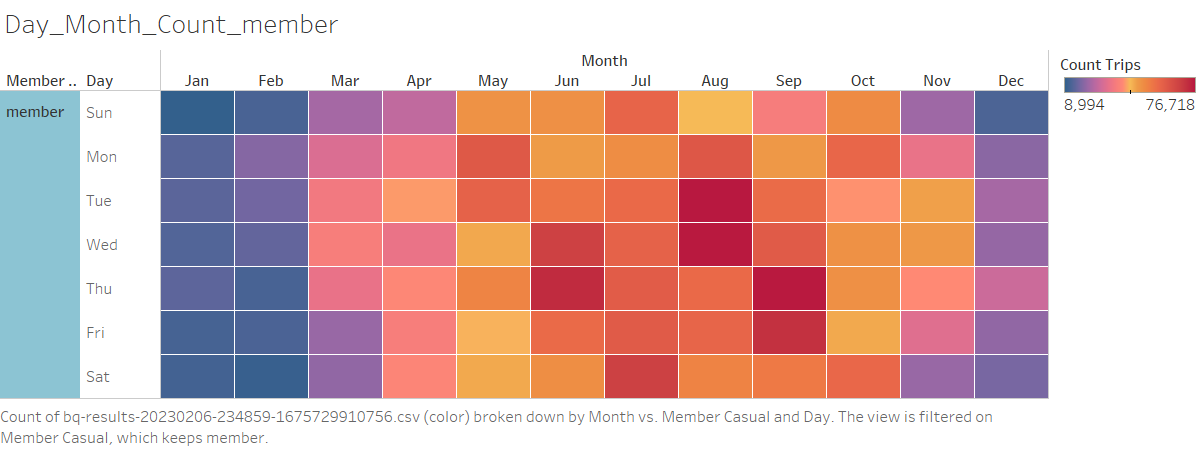

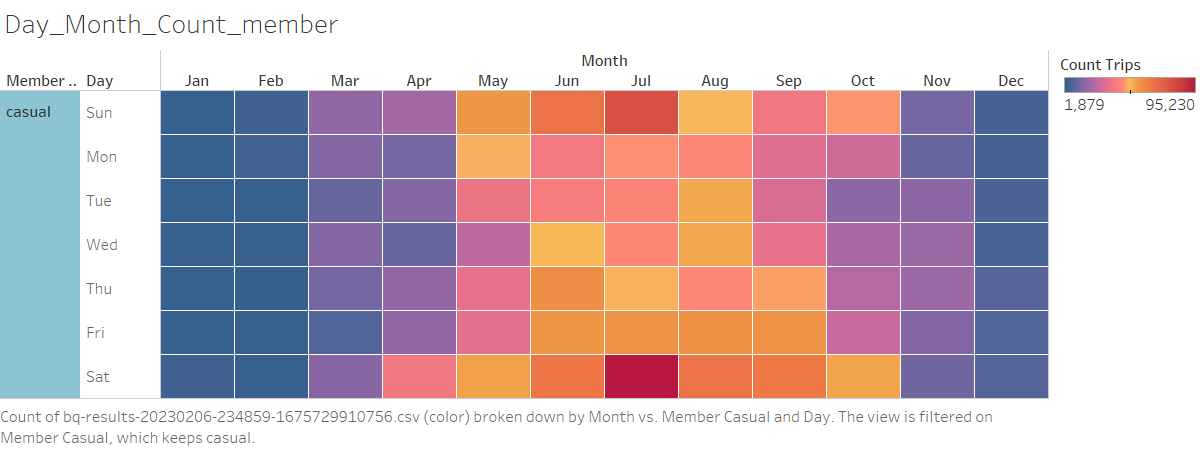

* Observations Viz 11:

* Mixes the viz 2 and 3 with a different format. Same observations.

12. Heat map, x = start_lat, y = start_lng and y = member_casual (makes a table for each), color = count trips

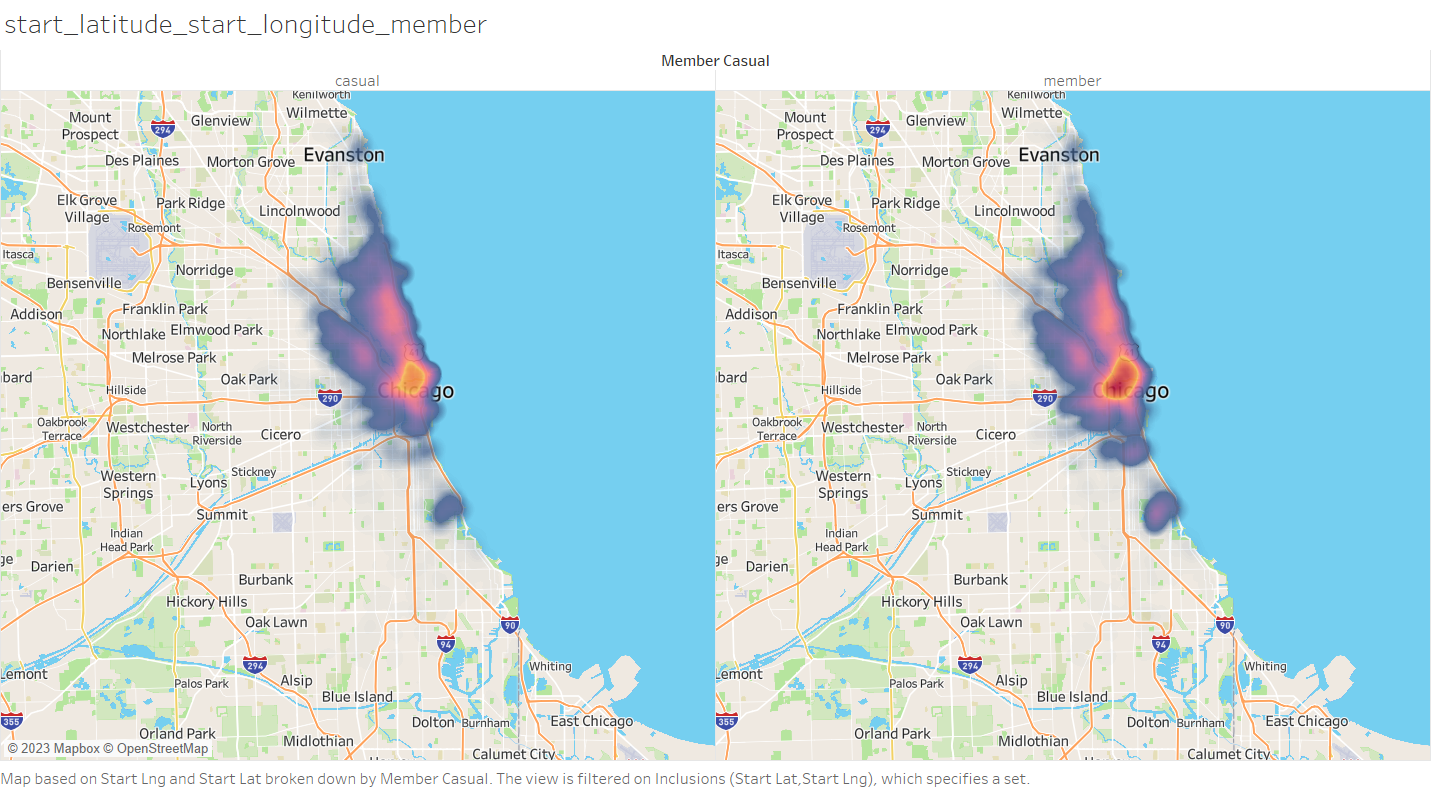

13. Heat map, x = end_lat, y = end_lmg and y = member_casual (makes a table for each), color = count trips

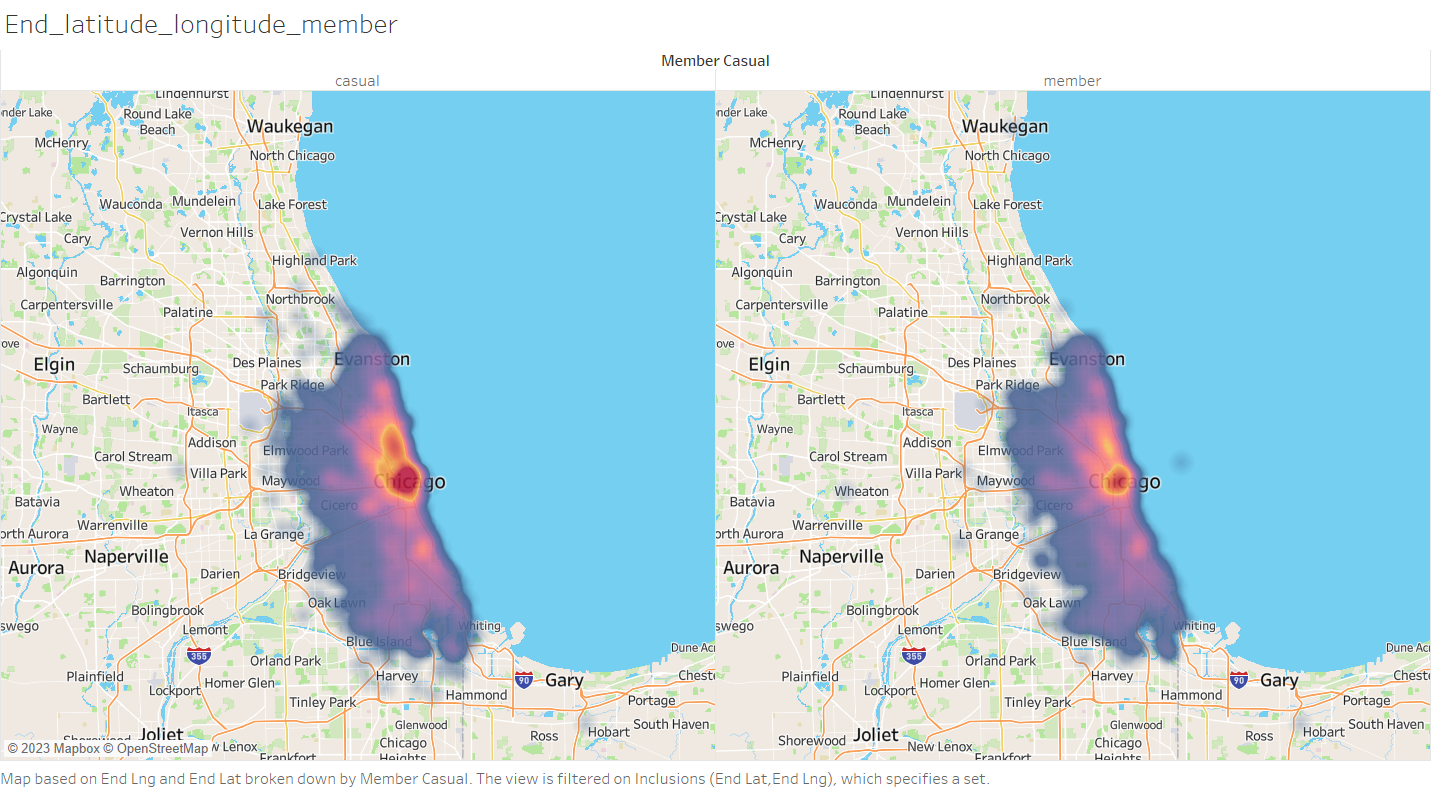

* Observations Viz 12 and 13:

* No differences worth noticing between annual members and casual riders. The further you move away from 
Chicago, the less trips are started and ended. It could be because suburbs are a lot less bike friendly 
than cities in general. 


* 3 can be compared with the chart "Chicago Temperature History 2022", "Daily Precipitation in 2022 in Chicago",
"Snow Depth in 2022 in Chicago" from [WeatherSpark.com](WeatherSpark.com)

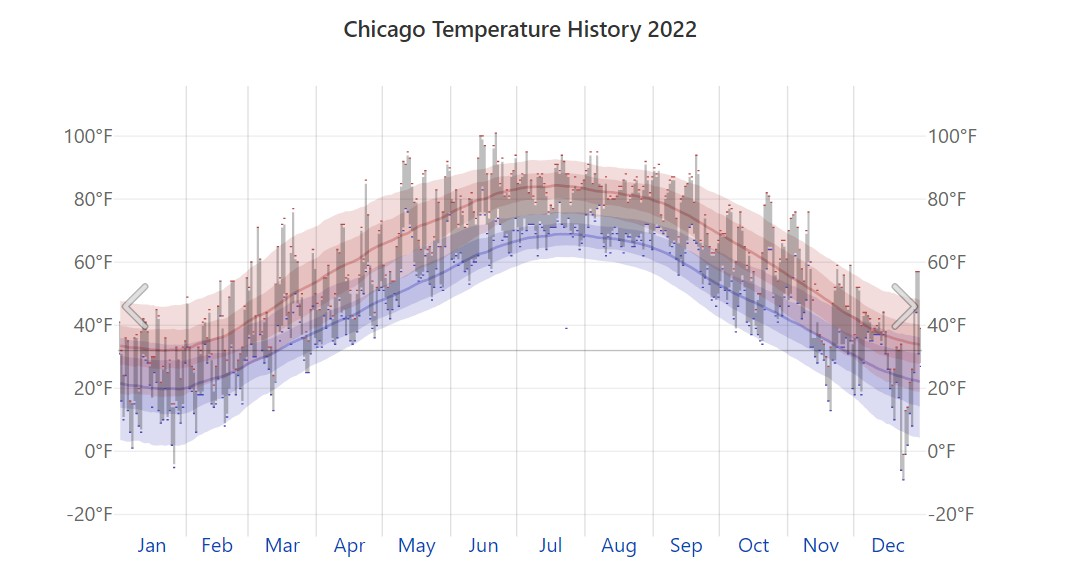

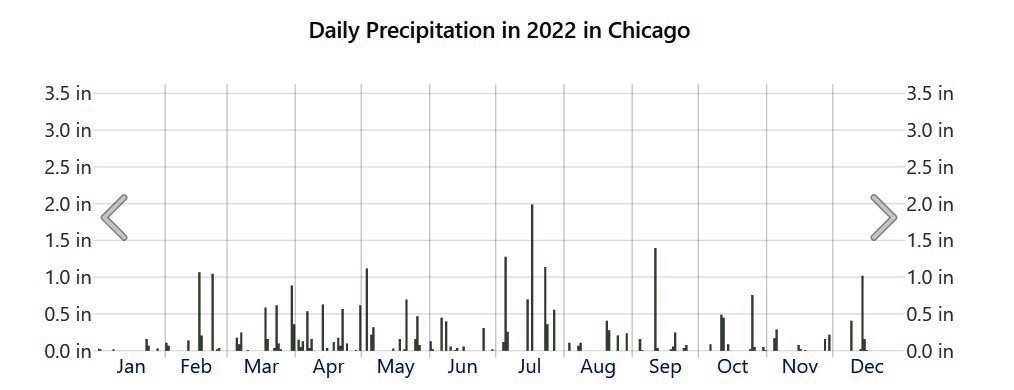

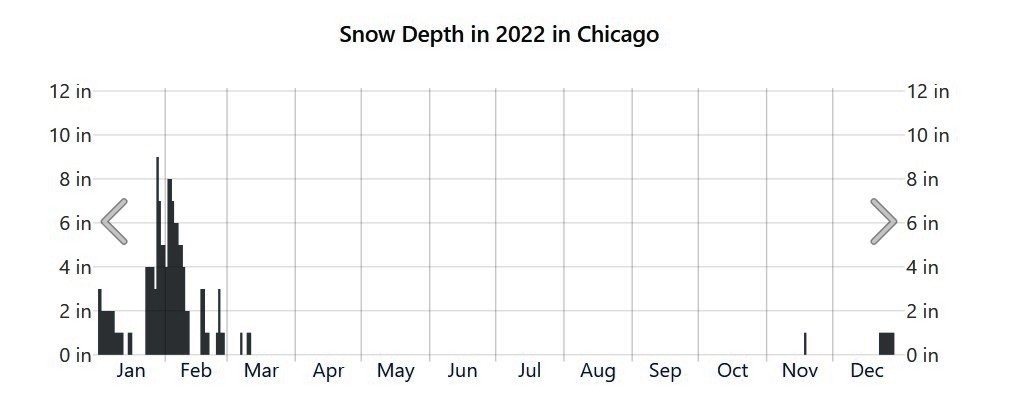

* 9 can be compared with the chart "Hourly Temperature in 2022 in Chicago" from [WeatherSpark.com](WeatherSpark.com)

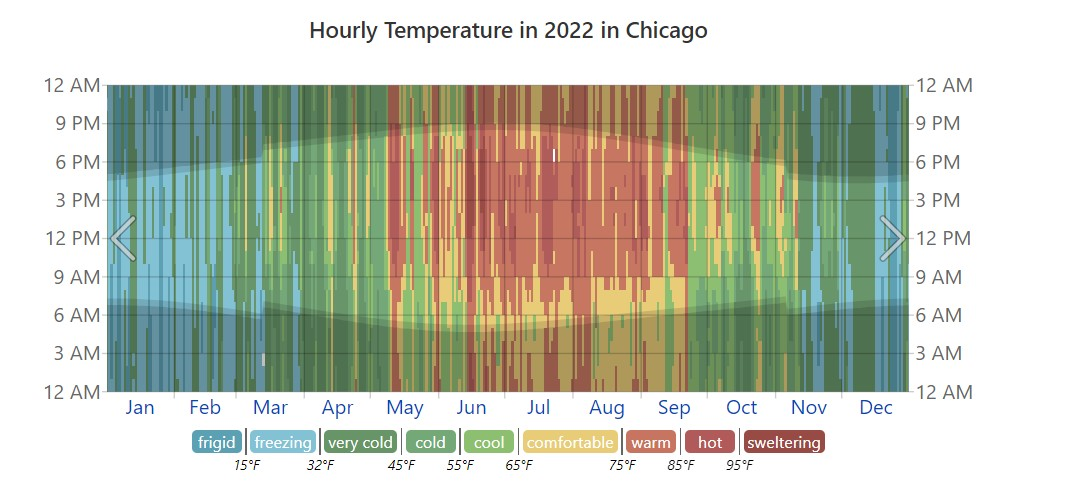
